In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Data Source:https://unstats.un.org/sdgs/UNSDGAPIV5/swagger/index.html
UN_Goals = pd.read_csv("Resources/UN_Goals.csv")

UN_Goals_clean = UN_Goals[["Target", 'GeoAreaName', 'TimePeriod', 'Value', '[Units]']]
UN_Goals_clean.head(20)

,Target,GeoAreaName,TimePeriod,Value,[Units]
0,13.2,Canada,1990,601.52369,MT_CO2E
1,13.2,Canada,1991,595.77673,MT_CO2E
2,13.2,Canada,1992,613.59852,MT_CO2E
3,13.2,Canada,1993,616.79839,MT_CO2E
4,13.2,Canada,1994,638.00047,MT_CO2E
5,13.2,Canada,1995,656.29872,MT_CO2E
6,13.2,Canada,1996,678.71449,MT_CO2E
7,13.2,Canada,1997,691.19537,MT_CO2E
8,13.2,Canada,1998,696.90152,MT_CO2E
9,13.2,Canada,1999,709.60092,MT_CO2E


In [3]:
# Data Source: https://data.ec.gc.ca/data/substances/monitor/canada-s-official-greenhouse-gas-inventory/B-Economic-Sector/?lang=en

Canada_Result = pd.read_csv("Resources/Economic_Sector_Canada.csv")
Canada_Result.head(20)

,Sectors - Mt CO2 eq,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NATIONAL TOTAL,595,588,605,608,628,645,667,682,689,...,721,726,732,730,733,715,725,740,738,672
1,Oil and Gas,103,102,111,118,122,128,135,137,141,...,187,194,199,205,205,194,196,205,203,179
2,Electricity,95,96,103,93,95,98,98,109,122,...,87,83,80,76,80,74,73,63,62,56
3,Transport,120,114,115,117,121,122,126,131,137,...,168,171,174,171,172,173,179,184,185,159
4,Heavy Industry,97,97,95,94,100,100,103,103,98,...,80,80,79,79,78,76,76,77,77,72
5,Buildings,71,71,72,76,76,77,83,81,72,...,85,83,84,85,84,82,87,93,92,88
6,Agriculture,52,52,55,57,59,62,63,64,64,...,62,64,65,64,65,65,64,66,67,69
7,Waste,24,25,25,25,26,26,26,26,27,...,26,26,26,26,26,26,27,27,27,27
8,Coal Production,4,4,4,4,4,4,4,4,3,...,3,3,3,2,2,2,2,3,3,2
9,"Light Manufacturing, Construction and Forest R...",28,27,26,24,25,27,27,28,24,...,23,22,22,21,21,21,22,22,22,20


In [16]:
# Data Source: https://data.ec.gc.ca/data/substances/monitor/canada-s-official-greenhouse-gas-inventory/B-Economic-Sector/?lang=en

Provinces_Result = pd.read_csv("Resources/Economic_Sector_Prov.csv")
Provinces_Result.head(20)

,Year,Region,Index,Source,CO2eq,Unit
0,1990,Alberta,0,Provincial Inventory Total,165.65,Mt
1,1990,Alberta,1,Oil and Gas,61.96,Mt
2,1990,Alberta,2,Electricity,39.76,Mt
3,1990,Alberta,3,Transport,15.78,Mt
4,1990,Alberta,4,Heavy Industry,12.59,Mt
5,1990,Alberta,5,Buildings,12.03,Mt
6,1990,Alberta,6,Agriculture,14.95,Mt
7,1990,Alberta,7,Waste,2.4,Mt
8,1990,Alberta,8,Coal Production,0.6,Mt
9,1990,Alberta,9,"Light Manufacturing, Construction and Forest R...",5.58,Mt


In [13]:
#transposed
df1 = Canada_Result.set_index(['Sectors - Mt CO2 eq'])
df2 = df1.transpose()
#df3 = df2[['NATIONAL TOTAL','Oil and Gas', 'Electricity', 'Transport']]
df4 = df2.reset_index()
transpose_can_result = df4.rename(columns={'index':'Years'})
transpose_can_result.head()

Sectors - Mt CO2 eq,Years,NATIONAL TOTAL,Oil and Gas,Electricity,Transport,Heavy Industry,Buildings,Agriculture,Waste,Coal Production,"Light Manufacturing, Construction and Forest Resources"
0,1990,595,103,95,120,97,71,52,24,4,28
1,1991,588,102,96,114,97,71,52,25,4,27
2,1992,605,111,103,115,95,72,55,25,4,26
3,1993,608,118,93,117,94,76,57,25,4,24
4,1994,628,122,95,121,100,76,59,26,4,25


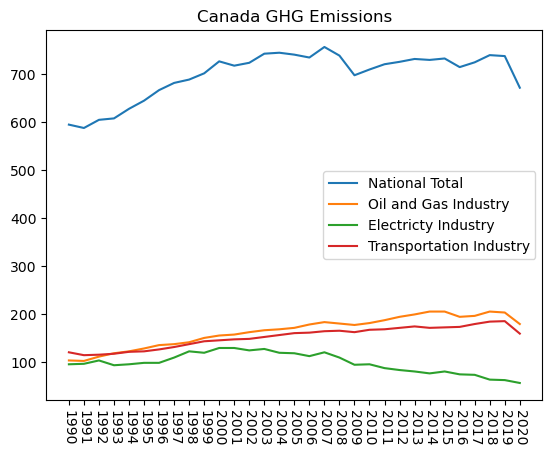

---------------------------------------------------------------------------


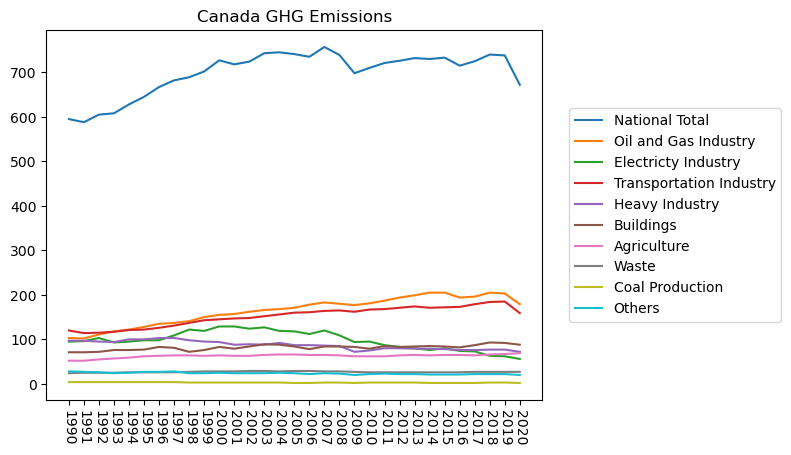

---------------------------------------------------------------------------


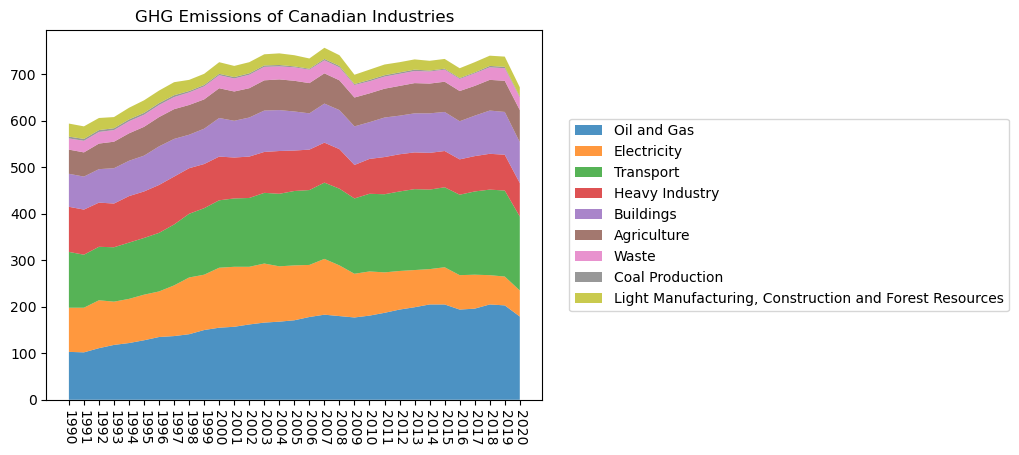

In [19]:
#two line graphs and stackplot

y2_nat_ttl = transpose_can_result['NATIONAL TOTAL']
y2_oil_gas = transpose_can_result['Oil and Gas']
y2_elec = transpose_can_result['Electricity']
y2_transp = transpose_can_result['Transport']
x2_years = transpose_can_result['Years']

plt.plot(x2_years, y2_nat_ttl, label = 'National Total')
plt.plot(x2_years, y2_oil_gas, label = 'Oil and Gas Industry')
plt.plot(x2_years, y2_elec, label = 'Electricty Industry')
plt.plot(x2_years, y2_transp, label = 'Transportation Industry')
plt.legend()
plt.xticks(rotation = 270)
plt.title('Canada GHG Emissions')
plt.show()

print("---------------------------------------------------------------------------")

y_nat_ttl = transpose_can_result['NATIONAL TOTAL']
y_oil_gas = transpose_can_result['Oil and Gas']
y_elec = transpose_can_result['Electricity']
y_transp = transpose_can_result['Transport']
y_hvyind = transpose_can_result['Heavy Industry']
y_bldgs = transpose_can_result['Buildings']
y_agri = transpose_can_result['Agriculture']
y_wst = transpose_can_result['Waste']
y_coal = transpose_can_result['Coal Production']
y_lmcfr = transpose_can_result['Light Manufacturing, Construction and Forest Resources']
x_years = transpose_can_result['Years']

plt.plot(x_years, y_nat_ttl, label = 'National Total')
plt.plot(x_years, y_oil_gas, label = 'Oil and Gas Industry')
plt.plot(x_years, y_elec, label = 'Electricty Industry')
plt.plot(x_years, y_transp, label = 'Transportation Industry')
plt.plot(x_years, y_hvyind, label = 'Heavy Industry')
plt.plot(x_years, y_bldgs, label = 'Buildings')
plt.plot(x_years, y_agri, label = 'Agriculture')
plt.plot(x_years, y_wst, label = 'Waste')
plt.plot(x_years, y_coal, label = 'Coal Production')
plt.plot(x_years, y_lmcfr, label = 'Others')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.xticks(rotation = 270)
plt.title('Canada GHG Emissions')
plt.show()

print("---------------------------------------------------------------------------")

emissions_df = transpose_can_result[['Oil and Gas', 'Electricity', 'Transport', 
                                    'Heavy Industry', 'Buildings', 'Agriculture', 'Waste', 'Coal Production', 
                                    'Light Manufacturing, Construction and Forest Resources']]
emissions_dict = emissions_df.to_dict('list')

years = transpose_can_result['Years']


fig, ax = plt.subplots()
ax.stackplot(years, emissions_dict.values(), labels = emissions_dict.keys(), alpha = 0.8)
ax.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.xticks(rotation = 270)
plt.title('GHG Emissions of Canadian Industries')
plt.show()



In [20]:
provres1 = Provinces_Result[['Year', 'Region', 'Source', 'CO2eq', 'Unit']]
provres2 = provres1.loc[(provres1['Region'] == 'Alberta') | (provres1['Region'] == 'Quebec') | (provres1['Region'] == 'Ontario')]
provres3 = provres2.loc[(provres2['Source'] == 'Oil and Gas') | (provres2['Source'] == 'Electricity') | (provres2['Source'] == 'Transport')]
provres3

,Year,Region,Source,CO2eq,Unit
1,1990,Alberta,Oil and Gas,61.96,Mt
2,1990,Alberta,Electricity,39.76,Mt
3,1990,Alberta,Transport,15.78,Mt
78,1990,Ontario,Oil and Gas,10.25,Mt
79,1990,Ontario,Electricity,25.99,Mt
...,...,...,...,...,...
3886,2020,Ontario,Electricity,3.16,Mt
3887,2020,Ontario,Transport,47.77,Mt
3903,2020,Quebec,Oil and Gas,2.27,Mt
3904,2020,Quebec,Electricity,0.36,Mt


In [21]:
print(provres3['Region'].unique())
print(provres3['Source'].unique())

['Alberta' 'Ontario' 'Quebec']
['Oil and Gas' 'Electricity' 'Transport']
